# Classification for ODFM Dataset

This notebook uses ODFM dataset for training customized EffiecientNet models. the dataset consists of 120K samples for 12 classes to be classifed, so there are 10K samples for each class


### Importing libraries


In [11]:
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b0, efficientnet_b2
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchsig.transforms as ST
import numpy as np
import torchsig
import os
import shutil
from torch.utils.data import Subset
from Train_evaluate import *
from torchsig.datasets.sig53 import Sig53
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch import nn, optim


----
### Data Reading


In [2]:
# Specify Sig53 Options
root = "../../../../data/torchsig/sig53/"
train = True
impaired = False
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)

# Instantiate the Sig53 Clean Training Dataset
sig53_clean_train = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_train))
data, label = sig53_clean_train[idx]
print("Dataset length: {}".format(len(sig53_clean_train)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 149990
Data shape: (2, 4096)
Label Index: 7
Label Class: 8psk


----
### Dataloaders

In [3]:
# Calculate the size of the validation set (10% of the training set)
val_size = int(0.1 * len(sig53_clean_train))
train_size = len(sig53_clean_train) - val_size

# Split the training dataset into training and validation datasets
train_dataset, val_dataset = torch.utils.data.random_split(sig53_clean_train, [train_size, val_size])

# Create data loaders for training, validation, and testing
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

----
### Call and Train Model
Loading the model structure to be trained

#### EffieicentNet B0

In [4]:
model = efficientnet_b0(
    pretrained=False,
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [5]:
from torch import nn, optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20

In [6]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)

Epoch 1/20


Training: 100%|██████████| 8436/8436 [06:26<00:00, 21.80it/s, loss=1.4490, accuracy=44.17%]


Epoch 1: Train Loss 1.4486, Acc 44.17%, Val Loss 1.1861, Val Acc 51.45%
Epoch 2/20


Training: 100%|██████████| 8436/8436 [07:06<00:00, 19.79it/s, loss=1.0506, accuracy=54.66%]


Epoch 2: Train Loss 1.0505, Acc 54.66%, Val Loss 0.9005, Val Acc 60.24%
Epoch 3/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.68it/s, loss=0.9350, accuracy=58.88%]


Epoch 3: Train Loss 0.9350, Acc 58.88%, Val Loss 0.8021, Val Acc 63.39%
Epoch 4/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.67it/s, loss=0.7213, accuracy=67.66%]


Epoch 4: Train Loss 0.7212, Acc 67.66%, Val Loss 0.5241, Val Acc 76.00%
Epoch 5/20


Training: 100%|██████████| 8436/8436 [07:07<00:00, 19.72it/s, loss=0.5677, accuracy=74.85%]


Epoch 5: Train Loss 0.5676, Acc 74.85%, Val Loss 0.4508, Val Acc 80.32%
Epoch 6/20


Training: 100%|██████████| 8436/8436 [07:07<00:00, 19.73it/s, loss=0.4835, accuracy=78.95%]


Epoch 6: Train Loss 0.4834, Acc 78.95%, Val Loss 0.3759, Val Acc 83.60%
Epoch 7/20


Training: 100%|██████████| 8436/8436 [07:06<00:00, 19.77it/s, loss=0.4160, accuracy=82.23%]


Epoch 7: Train Loss 0.4159, Acc 82.23%, Val Loss 0.3212, Val Acc 86.09%
Epoch 8/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.69it/s, loss=0.3750, accuracy=84.14%]


Epoch 8: Train Loss 0.3750, Acc 84.14%, Val Loss 0.3232, Val Acc 86.29%
Epoch 9/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.66it/s, loss=0.3495, accuracy=85.29%]


Epoch 9: Train Loss 0.3495, Acc 85.29%, Val Loss 0.2821, Val Acc 87.85%
Epoch 10/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.71it/s, loss=0.3292, accuracy=86.05%]


Epoch 10: Train Loss 0.3291, Acc 86.05%, Val Loss 0.2981, Val Acc 87.35%
Epoch 11/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.67it/s, loss=0.3073, accuracy=87.01%]


Epoch 11: Train Loss 0.3073, Acc 87.01%, Val Loss 0.2611, Val Acc 88.07%
Epoch 12/20


Training: 100%|██████████| 8436/8436 [07:06<00:00, 19.79it/s, loss=0.2905, accuracy=87.73%]


Epoch 12: Train Loss 0.2904, Acc 87.73%, Val Loss 0.2551, Val Acc 89.26%
Epoch 13/20


Training: 100%|██████████| 8436/8436 [07:07<00:00, 19.74it/s, loss=0.2781, accuracy=88.41%]


Epoch 13: Train Loss 0.2781, Acc 88.41%, Val Loss 0.2600, Val Acc 89.15%
Epoch 14/20


Training: 100%|██████████| 8436/8436 [07:07<00:00, 19.71it/s, loss=0.2699, accuracy=88.86%]


Epoch 14: Train Loss 0.2699, Acc 88.86%, Val Loss 0.2353, Val Acc 90.15%
Epoch 15/20


Training: 100%|██████████| 8436/8436 [07:09<00:00, 19.66it/s, loss=0.2609, accuracy=89.25%]


Epoch 15: Train Loss 0.2609, Acc 89.25%, Val Loss 0.2241, Val Acc 90.64%
Epoch 16/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.70it/s, loss=0.2582, accuracy=89.52%]


Epoch 16: Train Loss 0.2581, Acc 89.52%, Val Loss 0.2297, Val Acc 90.57%
Epoch 17/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.70it/s, loss=0.2493, accuracy=89.84%]


Epoch 17: Train Loss 0.2492, Acc 89.84%, Val Loss 0.2048, Val Acc 91.25%
Epoch 18/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.69it/s, loss=0.2436, accuracy=90.00%]


Epoch 18: Train Loss 0.2436, Acc 90.00%, Val Loss 0.2842, Val Acc 89.65%
Epoch 19/20


Training: 100%|██████████| 8436/8436 [07:07<00:00, 19.71it/s, loss=0.2455, accuracy=90.03%]


Epoch 19: Train Loss 0.2455, Acc 90.03%, Val Loss 0.2206, Val Acc 91.04%
Epoch 20/20


Training: 100%|██████████| 8436/8436 [07:08<00:00, 19.68it/s, loss=0.2420, accuracy=90.17%]


Epoch 20: Train Loss 0.2420, Acc 90.17%, Val Loss 0.2286, Val Acc 90.39%
Stopping early due to no improvement in validation accuracy.
Loaded best model from best_model_checkpoint.pth


----
### Evaluation

Validation Loss: 0.2048
Validation Accuracy: 91.25%


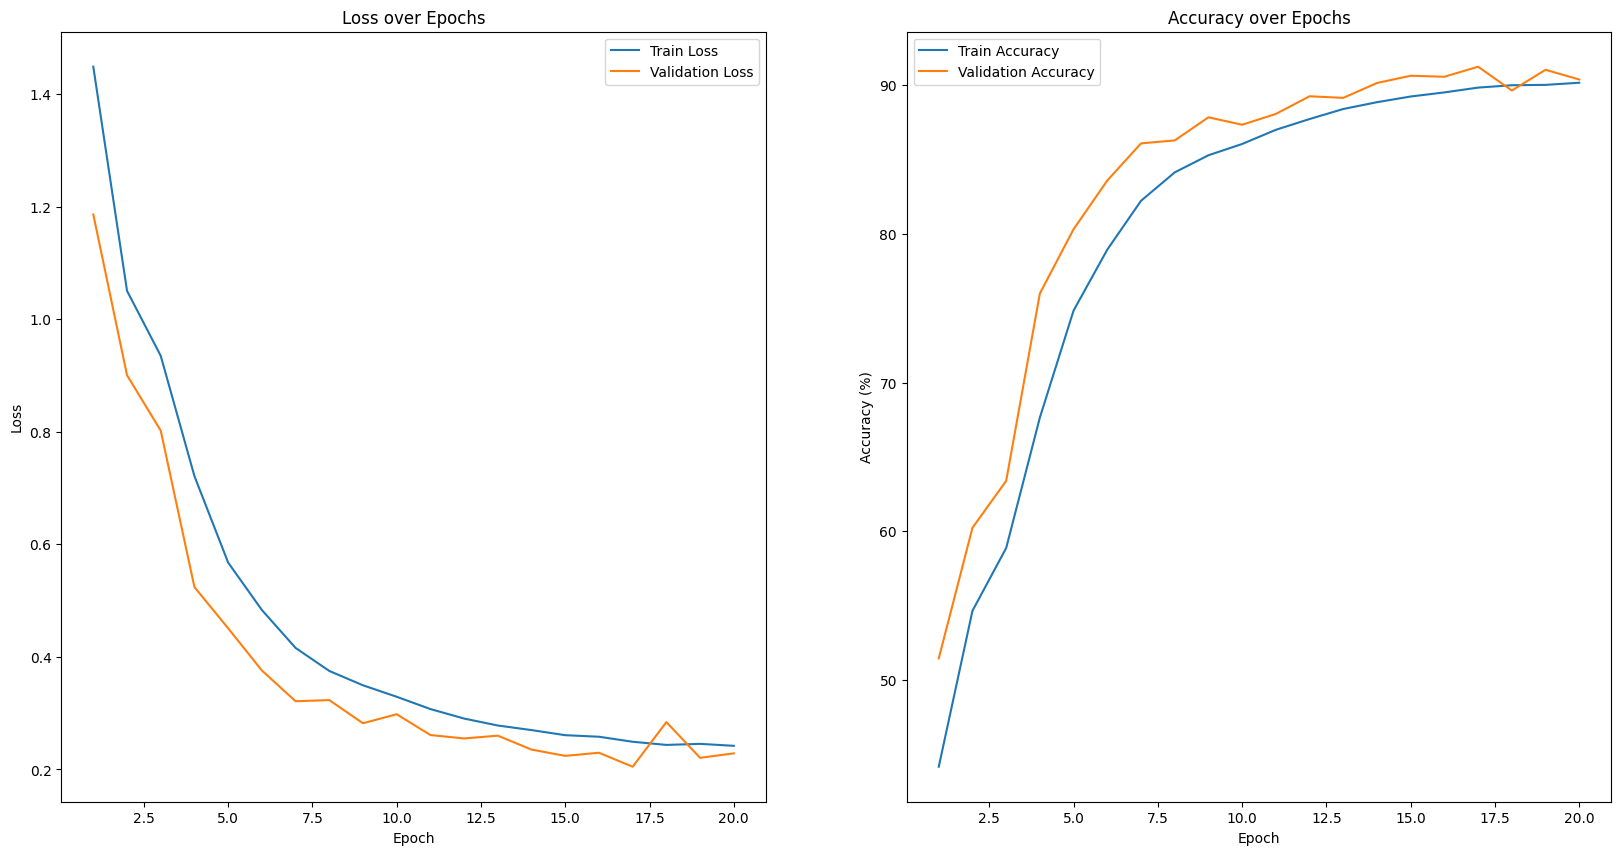

<Figure size 1500x1500 with 0 Axes>

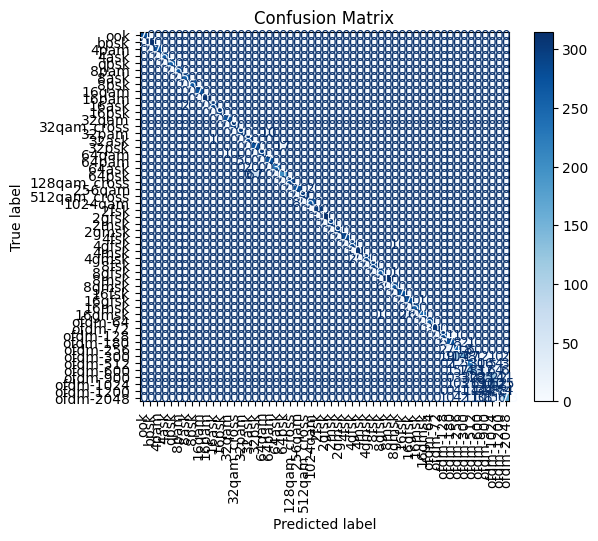

In [12]:
results = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_metrics(trainer, labels, predictions)

plot_conf_matrix( labels, predictions,class_list)

In [22]:
torch.save(trainer.model.state_dict(), './models/sig53_150')

In [13]:

report = classification_report(labels, predictions, target_names=class_list)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         ook       1.00      1.00      1.00       278
        bpsk       1.00      1.00      1.00       315
        4pam       1.00      1.00      1.00       272
        4ask       1.00      1.00      1.00       262
        qpsk       1.00      1.00      1.00       255
        8pam       1.00      1.00      1.00       269
        8ask       0.99      1.00      1.00       257
        8psk       1.00      1.00      1.00       264
       16qam       1.00      1.00      1.00       273
       16pam       1.00      1.00      1.00       309
       16ask       1.00      0.99      0.99       289
       16psk       1.00      1.00      1.00       293
       32qam       1.00      1.00      1.00       270
 32qam_cross       1.00      1.00      1.00       291
       32pam       0.98      0.97      0.98       304
       32ask       0.99      1.00      0.99       288
       32psk       0.80      0.94      0.87       292
    